In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

Format of the file: age_gender_ethnicity_datetime

In [2]:
path = "UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[50])

Total samples: 23708
10_0_0_20170110224402264.jpg.chip.jpg


In [3]:
import cv2
images = []
ages = []
#genders = []
#prova = cv2.imread(path+files[43])
#cv2.imshow('prova',prova)
#cv2.waitKey()
#cv2.destroyAllWindows()

for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    #genders.append(int(split_var[1]) )

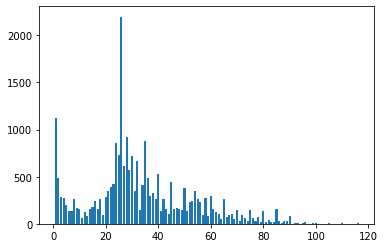

Max value: 116


In [5]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

Age: 105


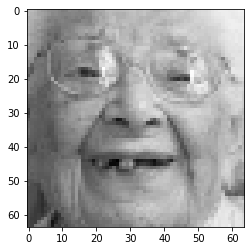

In [7]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 15
sample = images[idx]
print("Age:",ages[idx])
display(sample)

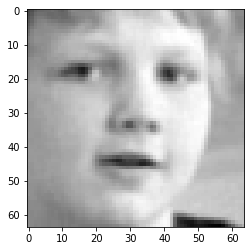

10_0_0_20170110224402264.jpg.chip.jpg
10


In [8]:
# pre processing
target = np.zeros(size,dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i] = int(ages[i])
    #target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255


idx=50
display(features[idx])
print(files[idx])
print(ages[idx])

In [9]:
files[0]

'100_0_0_20170112213500903.jpg.chip.jpg'

In [10]:
from sklearn.model_selection import train_test_split
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
x_train, x_test, y_train, y_test, name_train, name_test = train_test_split(features, target, files, test_size=0.3,random_state=42,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 16595
Samples in Testing: 7113


In [13]:
from pathlib import Path
import shutil

#controllo se le cartelle test e training sono già presenti
print(os.path.isdir("training"))
print(os.path.isdir("test"))

#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (len(os.listdir("training/"))== x_train.shape[0])):
    if((os.path.isdir("test")) and (len(os.listdir("test/"))== x_test.shape[0])):
        firstExec = False

print(firstExec)
print(x_train.shape[0])

False
False
True
16595


In [14]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,x_train.shape[0]):
        shutil.copy(path+name_train[i],"training/"+name_train[i])
        #print("training/"+name_train[i])
        
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,x_test.shape[0]):
        shutil.copy(path+name_test[i],"test/"+name_test[i])
        #print("training/"+name_train[i])

    

In [16]:
#controllo il numero di file nelle 2 cartelle
print(len(os.listdir("training/")))
print(len(os.listdir("test/")))

16595
7113


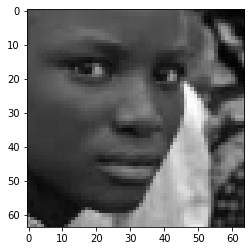

19.0
19_1_1_20170112191242381.jpg.chip.jpg


In [82]:
idx=50
display(x_train[idx])
print(y_train[idx])
print(name_train[idx])